In [2]:
import pandas as pd
import numpy as np

In [3]:
gps = pd.read_csv('googleplaystore.csv')
gps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [369]:
#Taking a look at the data types and what needs to be cleaned 
#Price, Installs, Reviews need to be converted to int
#Category, Content Rating and Typy converted to Boolean columns
#Columns that can be dropped: Genre, Last updated, current ver, android ver,
gps.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [370]:
gps.drop(gps.columns[[9,10,11,12]], axis=1, inplace=True)

In [371]:
#Checking columns dropped
gps.head(0)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating


In [372]:
#check for and Null values 
null_values = gps.columns[gps.isnull().any()]
gps[null_values].isnull().sum()

Rating            1474
Type                 1
Content Rating       1
dtype: int64

In [373]:
gps[null_values].Rating
#line 10840 has Nan

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    NaN
10839    4.5
10840    4.5
Name: Rating, Length: 10841, dtype: float64

In [374]:
#droping rows with NaN and Null values 
gps = gps.dropna()
#Checking to see if they dropped
gps[null_values].Rating

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10834    4.0
10836    4.5
10837    5.0
10839    4.5
10840    4.5
Name: Rating, Length: 9366, dtype: float64

In [375]:
#resetting the index 
gps = gps.reset_index()

In [376]:
#I like to double check my code. The Index was reset
gps[null_values].Rating

0       4.1
1       3.9
2       4.7
3       4.5
4       4.3
       ... 
9361    4.0
9362    4.5
9363    5.0
9364    4.5
9365    4.5
Name: Rating, Length: 9366, dtype: float64

In [377]:
#Looking at what needs to be stripped from the string to convert to numerical 
print(gps.Installs)

0           10,000+
1          500,000+
2        5,000,000+
3       50,000,000+
4          100,000+
           ...     
9361           500+
9362         5,000+
9363           100+
9364         1,000+
9365    10,000,000+
Name: Installs, Length: 9366, dtype: object


In [378]:
gps['Installs'] = gps['Installs'].map(lambda x: x.strip('+'))
gps['Installs'] = gps['Installs'].map(lambda x: x.replace(',',''))

In [379]:
gps["Installs"]

0          10000
1         500000
2        5000000
3       50000000
4         100000
          ...   
9361         500
9362        5000
9363         100
9364        1000
9365    10000000
Name: Installs, Length: 9366, dtype: object

In [380]:
gps['Installs'] = gps['Installs'].astype(int)

In [381]:
gps.dtypes

index               int64
App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs            int64
Type               object
Price              object
Content Rating     object
dtype: object

In [382]:
gps["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [383]:
gps['Price'] = gps['Price'].map(lambda x: x.strip('$'))

In [384]:
gps['Price'] = gps['Price'].astype(float)

In [385]:
gps["Price"].describe()

count    9366.000000
mean        0.960928
std        15.816585
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [386]:
#Convert Reviews to int
gps["Reviews"]

0          159
1          967
2        87510
3       215644
4          967
         ...  
9361         7
9362        38
9363         4
9364       114
9365    398307
Name: Reviews, Length: 9366, dtype: object

In [387]:
gps["Reviews"].describe()

count     9366
unique    5992
top          2
freq        83
Name: Reviews, dtype: object

In [388]:
gps['Reviews'] = gps['Reviews'].astype(int)
gps["Reviews"].unique()

array([   159,    967,  87510, ...,    603,   1195, 398307])

In [390]:
gps.head(0)

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating


In [391]:
import matplotlib.pyplot as plt

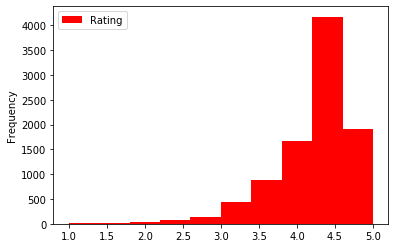

In [392]:
#Plot some of the data that's been cleaned
gps.plot(kind='hist',x='Installs', y='Rating', color='red')
plt.show()

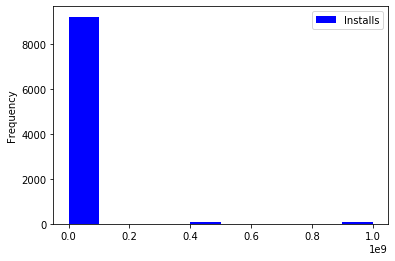

In [393]:
gps.plot(kind='hist',x='Price', y='Installs', color='blue')
plt.show()

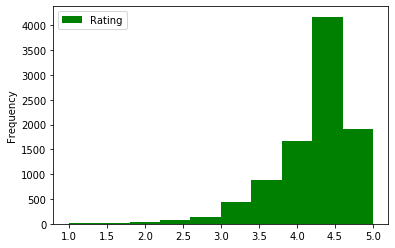

In [394]:
gps.plot(kind='hist',x='Price', y='Rating', color='green')
plt.show()

In [395]:
#Taking a look at the Type column 
gps["Type"].unique()

array(['Free', 'Paid'], dtype=object)

In [399]:
gps['Type'] = gps['Type'].astype('category')

In [400]:
gps["Type"].unique()

[Free, Paid]
Categories (2, object): [Free, Paid]

count     9366
unique       2
top       Free
freq      8719
Name: Type, dtype: object

In [340]:
gps["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [342]:
gps['Category'] = gps['Category'].astype('category')

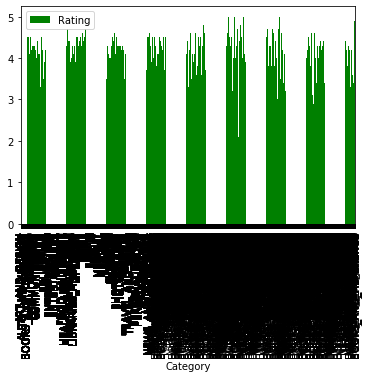

In [353]:
gps.plot(kind='bar',x='Category', y='Rating', color='green')
plt.show()

In [347]:
gps["Category"].unique()

[ART_AND_DESIGN, AUTO_AND_VEHICLES, BEAUTY, BOOKS_AND_REFERENCE, BUSINESS, ..., PARENTING, WEATHER, VIDEO_PLAYERS, NEWS_AND_MAGAZINES, MAPS_AND_NAVIGATION]
Length: 33
Categories (33, object): [ART_AND_DESIGN, AUTO_AND_VEHICLES, BEAUTY, BOOKS_AND_REFERENCE, ..., WEATHER, VIDEO_PLAYERS, NEWS_AND_MAGAZINES, MAPS_AND_NAVIGATION]